In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_goemotions_dataset = pd.read_csv("goemotions_1.csv")
print("len original",len(original_goemotions_dataset))

original_duplicates = original_goemotions_dataset.duplicated(subset=["text"]).sum()
print("number of duplicates:",original_duplicates)
print("\n")

w_o_duplicates = original_goemotions_dataset.copy()
w_o_duplicates = w_o_duplicates.drop_duplicates(subset=["text"]).reset_index(drop=True)
print("len dropped duplicates",len(w_o_duplicates))

duplicates_after_removing = w_o_duplicates.duplicated(subset=["text"]).sum()
print("number of duplicates after removing:",duplicates_after_removing)




len original 70000
number of duplicates: 26818


len dropped duplicates 43182
number of duplicates after removing: 0


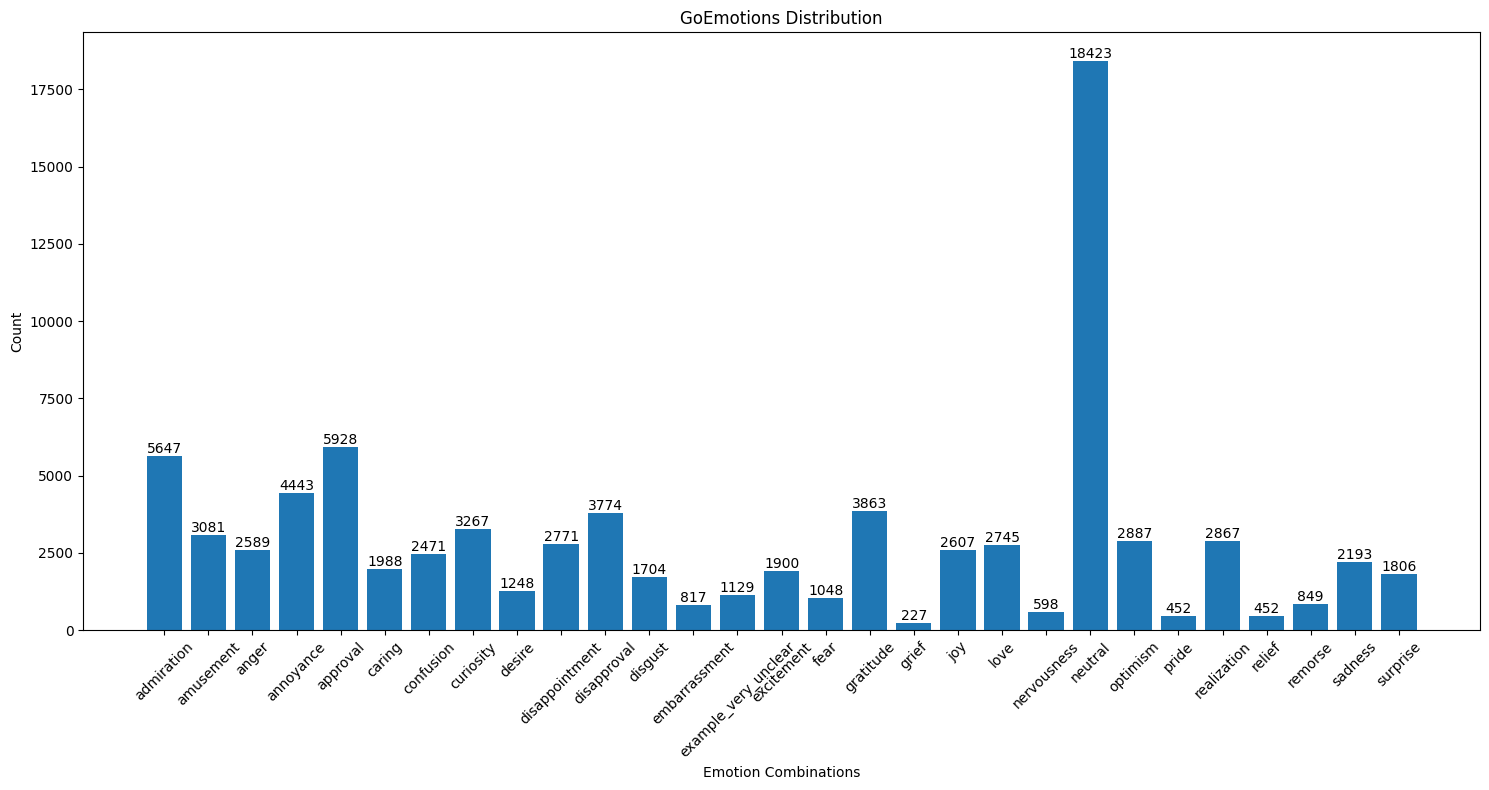

In [3]:
original_goemotions_dataset = pd.read_csv("goemotions_1.csv")
cols = sorted(original_goemotions_dataset.columns.to_list())
chosen_cols = [ 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'example_very_unclear', 'excitement', 'fear', 'gratitude', 'grief',  'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise',
]

features = original_goemotions_dataset[chosen_cols].copy()


# Get the combination counts
emotion_counts = features[chosen_cols].sum()
# Create a bar chart for the combinations
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(chosen_cols)), emotion_counts.values)
plt.xticks(range(len(chosen_cols)), chosen_cols,  # Split combination names into multiple lines
           rotation=45)
plt.xlabel("Emotion Combinations")
plt.ylabel("Count")
plt.title("GoEmotions Distribution")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()




In [4]:
reannotated_dataset = pd.read_csv("reannotated_goemotions.csv")
print("len original",len(reannotated_dataset))

original_duplicates = reannotated_dataset.duplicated(subset=["text"]).sum()
print("number of duplicates:",original_duplicates)
print("\n")

w_o_duplicates = reannotated_dataset.copy()
w_o_duplicates = reannotated_dataset.drop_duplicates(subset=["text"]).reset_index(drop=True)
print("len dropped duplicates",len(w_o_duplicates))

duplicates_after_removing = w_o_duplicates.duplicated(subset=["text"]).sum()
print("number of duplicates after removing:",duplicates_after_removing)




len original 54147
number of duplicates: 17001


len dropped duplicates 37146
number of duplicates after removing: 0


Number of samples in w_o_duplicates: 37146
38


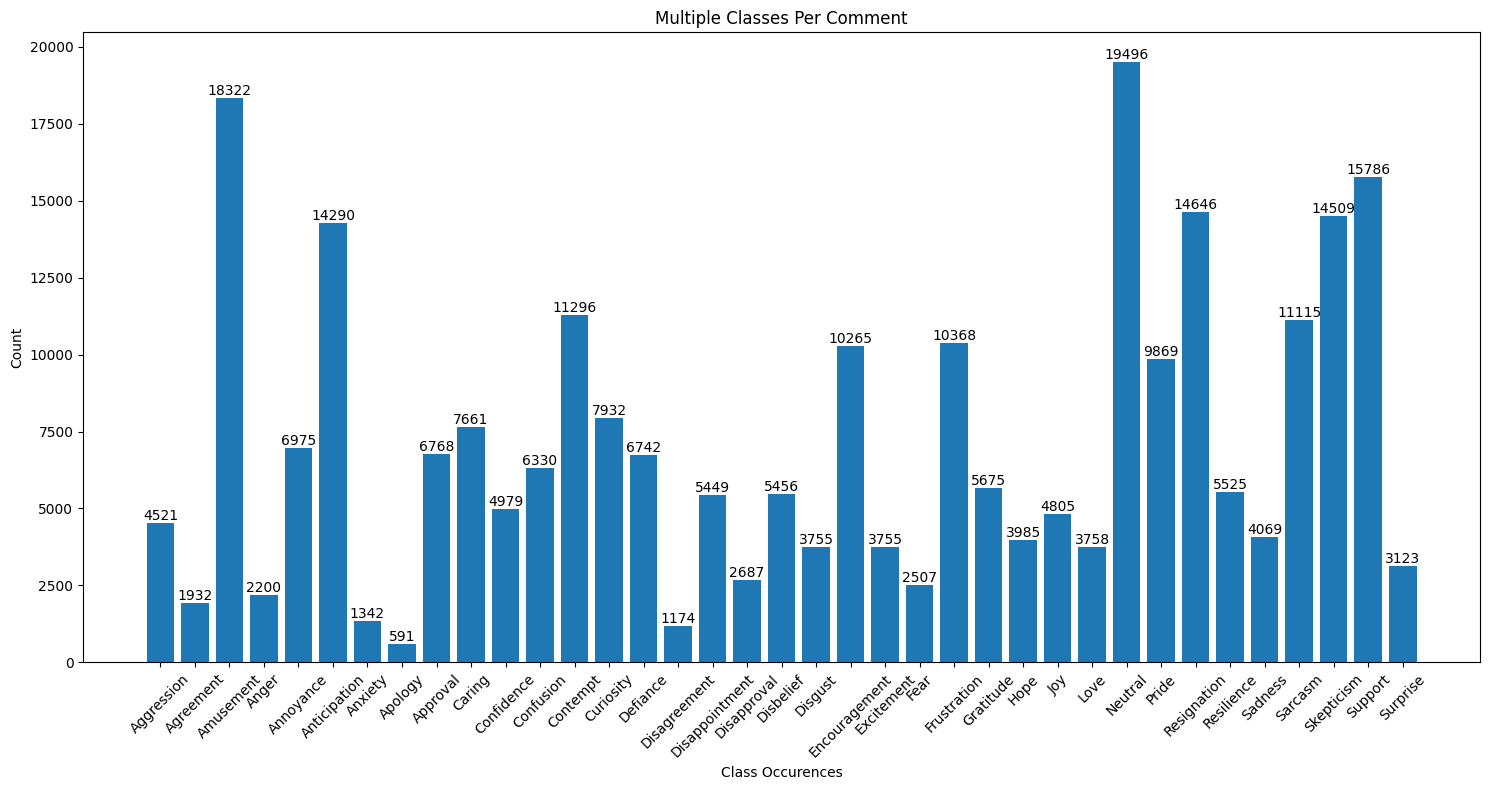

In [5]:
print("Number of samples in w_o_duplicates:", len(w_o_duplicates))
cols = sorted(w_o_duplicates.columns.to_list())
print(len(cols))
chosen_cols = [ 'Aggression', 'Agreement', 'Amusement', 'Anger', 'Annoyance', 'Anticipation', 'Anxiety', 'Apology', 'Approval', 'Caring', 'Confidence', 'Confusion', 'Contempt', 'Curiosity', 'Defiance', 'Disagreement', 'Disappointment', 'Disapproval', 'Disbelief', 'Disgust', 'Encouragement', 'Excitement', 'Fear', 'Frustration', 'Gratitude', 'Hope', 'Joy', 'Love', 'Neutral', 'Pride', 'Resignation', 'Resilience', 'Sadness', 'Sarcasm', 'Skepticism', 'Support', 'Surprise']
features = w_o_duplicates[chosen_cols].copy()


# Get the combination counts
emotion_counts = features[chosen_cols].sum()
# Create a bar chart for the combinations
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(chosen_cols)), emotion_counts.values)
plt.xticks(range(len(chosen_cols)), chosen_cols,  # Split combination names into multiple lines
           rotation=45)
plt.xlabel("Class Occurences")
plt.ylabel("Count")
plt.title("Multiple Classes Per Comment")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [6]:
reannotated_dataset = pd.read_csv("emotion_dataset_20.csv")
print("len original",len(reannotated_dataset))

original_duplicates = reannotated_dataset.duplicated(subset=["text"]).sum()
print("number of duplicates:",original_duplicates)
print("\n")

w_o_duplicates = reannotated_dataset.copy()
w_o_duplicates = reannotated_dataset.drop_duplicates(subset=["text"]).reset_index(drop=True)
print("len dropped duplicates",len(w_o_duplicates))

duplicates_after_removing = w_o_duplicates.duplicated(subset=["text"]).sum()
print("number of duplicates after removing:",duplicates_after_removing)




len original 54147
number of duplicates: 17001


len dropped duplicates 37146
number of duplicates after removing: 0


['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise', 'text']


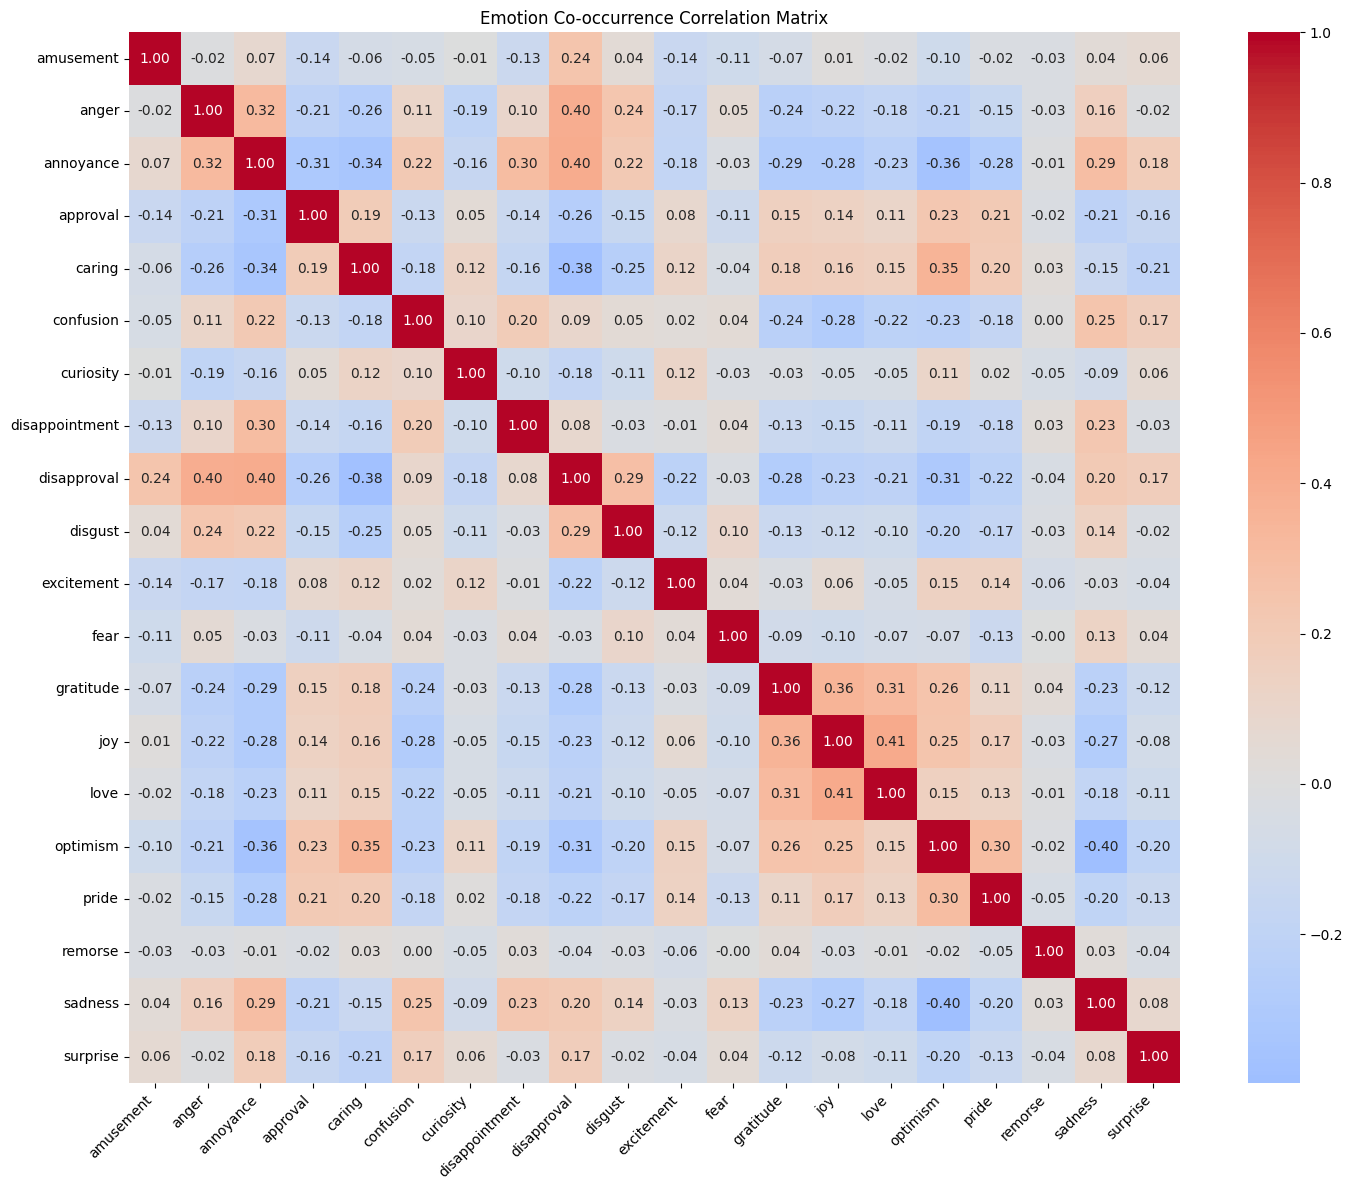

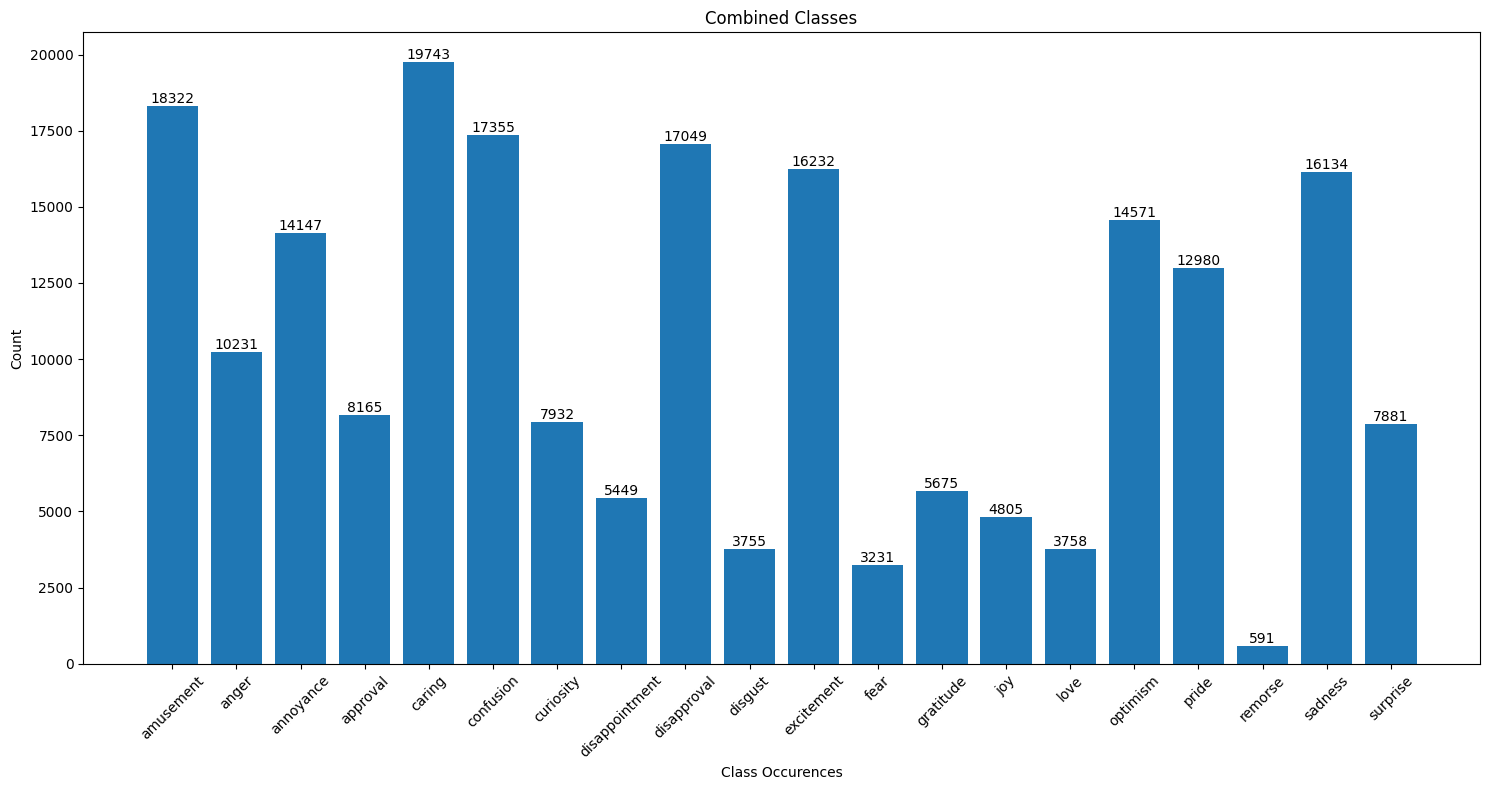

In [7]:
cols = sorted(w_o_duplicates.columns.to_list())
print(cols)
chosen_cols = ['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise']

features = w_o_duplicates[chosen_cols].copy()
# count_ones_per_row = (features == 1).sum(axis=1)
# Import required library if not already imported
import seaborn as sns

# Create correlation heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = features[chosen_cols].corr()
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True)  # Make the plot square-shaped
plt.title('Emotion Co-occurrence Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate and show most common emotion combinations
# Get the combination counts
emotion_counts = features[chosen_cols].sum()
# Create a bar chart for the combinations
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(chosen_cols)), emotion_counts.values)
plt.xticks(range(len(chosen_cols)), chosen_cols,  # Split combination names into multiple lines
           rotation=45)
plt.xlabel("Class Occurences")
plt.ylabel("Count")
plt.title("Combined Classes")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [8]:
reannotated_dataset = pd.read_csv("emotion_dataset_with_representative.csv")
print("len original",len(reannotated_dataset))

original_duplicates = reannotated_dataset.duplicated(subset=["text"]).sum()
print("number of duplicates:",original_duplicates)
print("\n")

w_o_duplicates = reannotated_dataset.copy()
w_o_duplicates = reannotated_dataset.drop_duplicates(subset=["text"]).reset_index(drop=True)
print("len dropped duplicates",len(w_o_duplicates))

duplicates_after_removing = w_o_duplicates.duplicated(subset=["text"]).sum()
print("number of duplicates after removing:",duplicates_after_removing)




len original 54147
number of duplicates: 17001


len dropped duplicates 37146
number of duplicates after removing: 0


['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise', 'text']


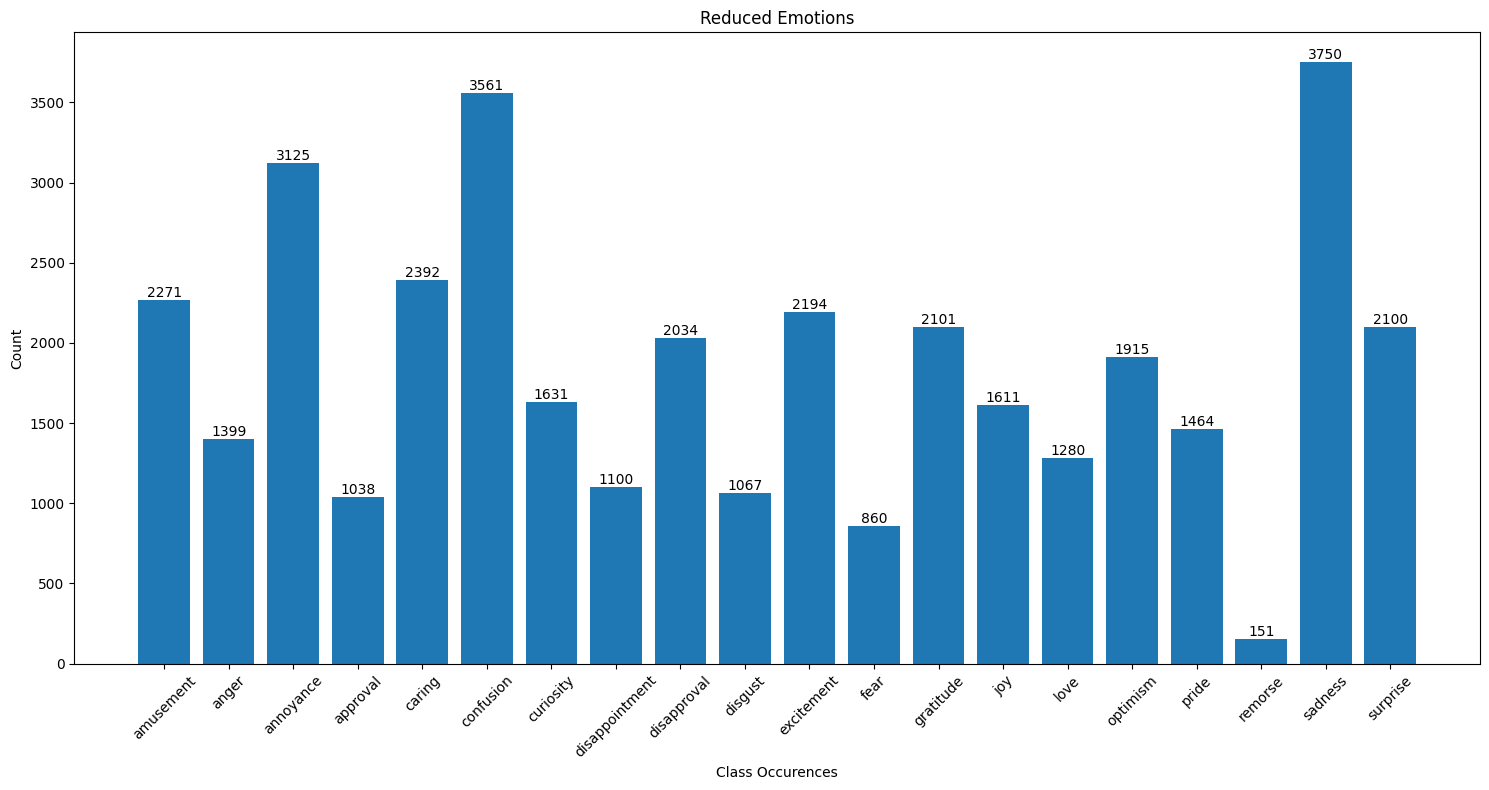

In [9]:
cols = sorted(w_o_duplicates.columns.to_list())
print(cols)
chosen_cols = ['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise']

features = w_o_duplicates[chosen_cols].copy()
# count_ones_per_row = (features == 1).sum(axis=1)
# Import required library if not already imported


# Calculate and show most common emotion combinations


# Get the combination counts
emotion_counts = features[chosen_cols].sum()
# Create a bar chart for the combinations
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(chosen_cols)), emotion_counts.values)
plt.xticks(range(len(chosen_cols)), chosen_cols,  # Split combination names into multiple lines
           rotation=45)
plt.xlabel("Class Occurences")
plt.ylabel("Count")
plt.title("Reduced Emotions")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [10]:
reannotated_dataset = pd.read_csv("true_synthetic_dataset.csv")
print("len original",len(reannotated_dataset))

original_duplicates = reannotated_dataset.duplicated(subset=["text"]).sum()
print("number of duplicates:",original_duplicates)
print("\n")

w_o_duplicates = reannotated_dataset.copy()
w_o_duplicates = reannotated_dataset.drop_duplicates(subset=["text"]).reset_index(drop=True)
print("len dropped duplicates",len(w_o_duplicates))

duplicates_after_removing = w_o_duplicates.duplicated(subset=["text"]).sum()
print("number of duplicates after removing:",duplicates_after_removing)




len original 55392
number of duplicates: 17038


len dropped duplicates 38354
number of duplicates after removing: 0


['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise', 'text']


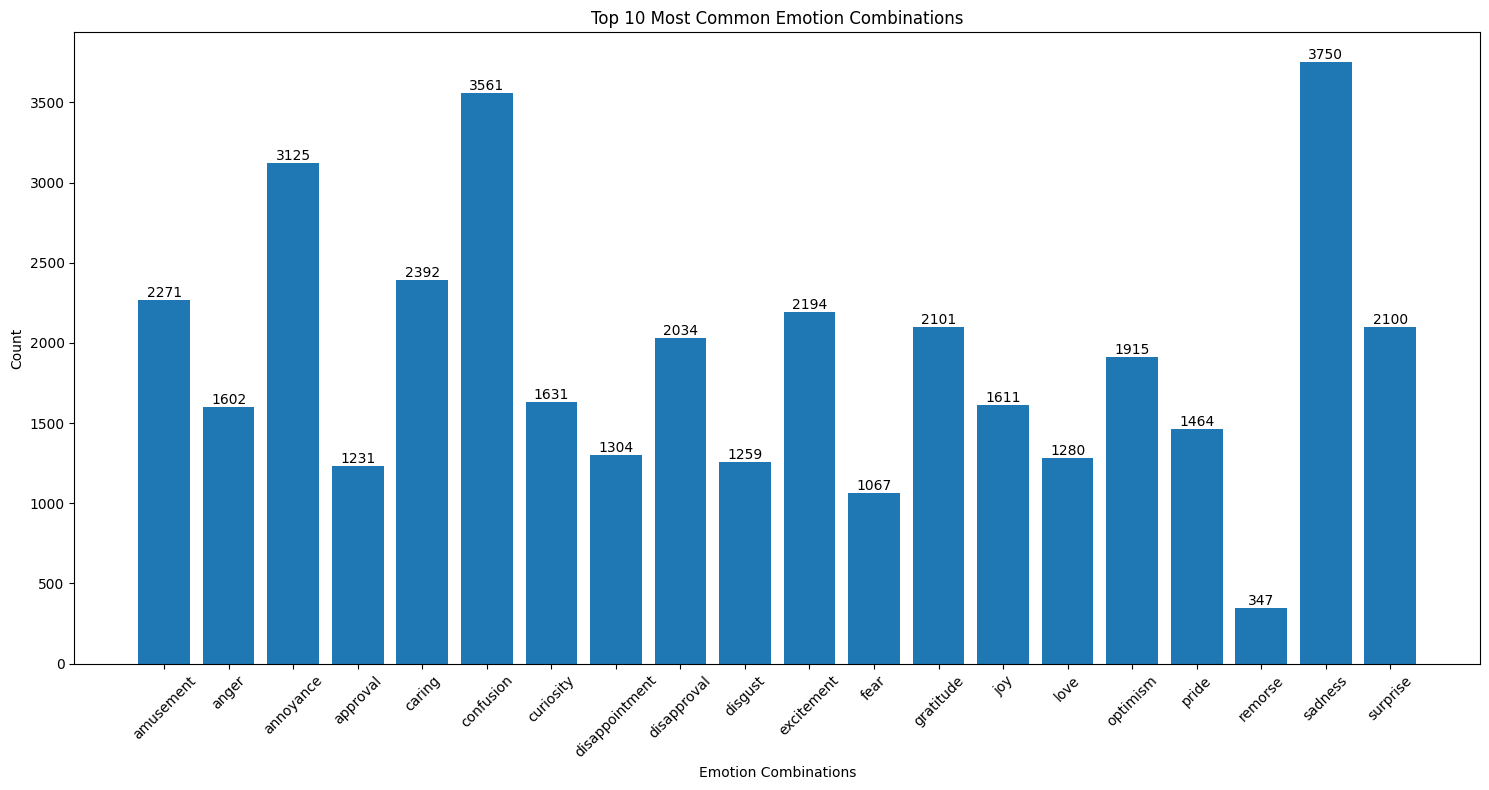

In [11]:
cols = sorted(w_o_duplicates.columns.to_list())
print(cols)
chosen_cols = ['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise']

features = w_o_duplicates[chosen_cols].copy()
# count_ones_per_row = (features == 1).sum(axis=1)
# Import required library if not already imported


# Calculate and show most common emotion combinations


# Get the combination counts
emotion_counts = features[chosen_cols].sum()
# Create a bar chart for the combinations
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(chosen_cols)), emotion_counts.values)
plt.xticks(range(len(chosen_cols)), chosen_cols,  # Split combination names into multiple lines
           rotation=45)
plt.xlabel("Emotion Combinations")
plt.ylabel("Count")
plt.title("Top 10 Most Common Emotion Combinations")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
reannotated_dataset = pd.read_csv("full_true_synthetic_comments.csv")
print("len original",len(reannotated_dataset))

original_duplicates = reannotated_dataset.duplicated(subset=["text"]).sum()
print("number of duplicates:",original_duplicates)
print("\n")

w_o_duplicates = reannotated_dataset.copy()
w_o_duplicates = reannotated_dataset.drop_duplicates(subset=["text"]).reset_index(drop=True)
print("len dropped duplicates",len(w_o_duplicates))

duplicates_after_removing = w_o_duplicates.duplicated(subset=["text"]).sum()
print("number of duplicates after removing:",duplicates_after_removing)




len original 44794
number of duplicates: 0


len dropped duplicates 44794
number of duplicates after removing: 0


['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'neutral', 'optimism', 'pride', 'remorse', 'sadness', 'surprise', 'text']


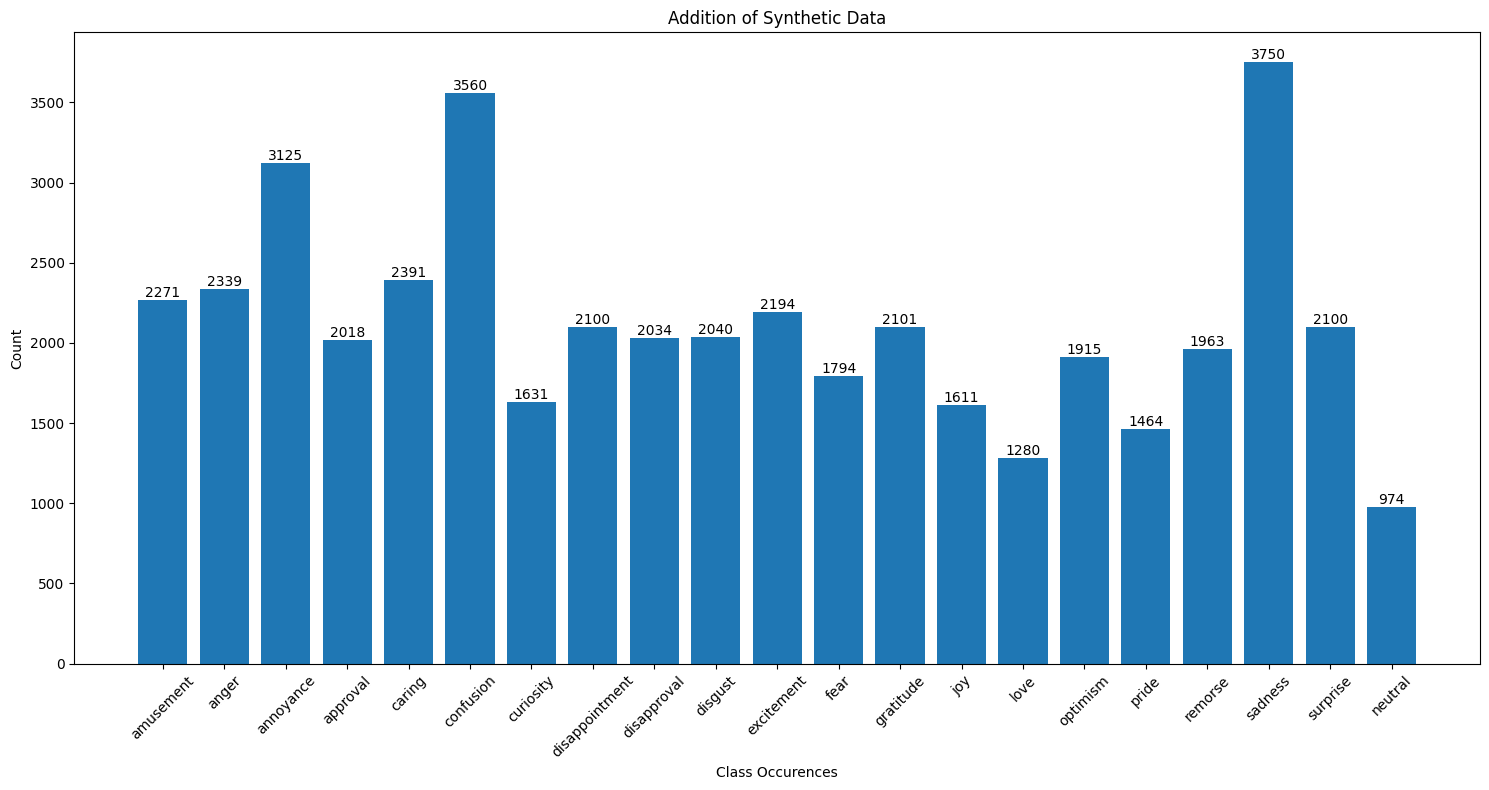

In [13]:
cols = sorted(w_o_duplicates.columns.to_list())
print(cols)
chosen_cols = ['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'remorse', 'sadness', 'surprise', 'neutral']

features = w_o_duplicates[chosen_cols].copy()
# count_ones_per_row = (features == 1).sum(axis=1)
# Import required library if not already imported


# Calculate and show most common emotion combinations


# Get the combination counts
emotion_counts = features[chosen_cols].sum()
# Create a bar chart for the combinations
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(chosen_cols)), emotion_counts.values)
plt.xticks(range(len(chosen_cols)), chosen_cols,  # Split combination names into multiple lines
           rotation=45)
plt.xlabel("Class Occurences")
plt.ylabel("Count")
plt.title("Addition of Synthetic Data")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Loading dataset from emotion_dataset_with_representative.csv...
Original dataset shape: (37146, 21)


100%|██████████| 37146/37146 [00:02<00:00, 17425.27it/s]


Class distribution in original dataset:


,emotion,count
18,sadness,3750
5,confusion,3561
2,annoyance,3125
4,caring,2392
0,amusement,2271
10,excitement,2194
12,gratitude,2101
19,surprise,2100
8,disapproval,2034
15,optimism,1915


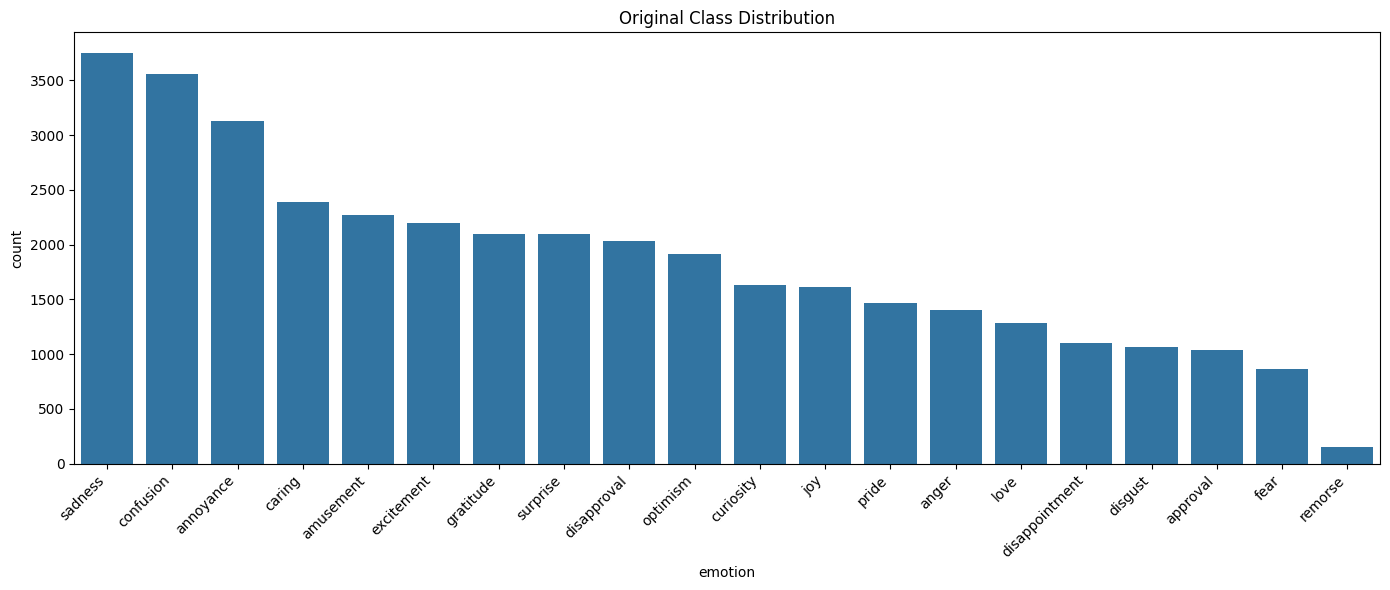


Balancing dataset to have up to 1700 samples per class...
amusement: Selected 1700 samples from 2271
anger: Keeping all 1399 samples (fewer than target)
annoyance: Selected 1700 samples from 3125
approval: Keeping all 1038 samples (fewer than target)
caring: Selected 1700 samples from 2392
confusion: Selected 1700 samples from 3561
curiosity: Keeping all 1631 samples (fewer than target)
disappointment: Keeping all 1100 samples (fewer than target)
disapproval: Selected 1700 samples from 2034
disgust: Keeping all 1067 samples (fewer than target)
excitement: Selected 1700 samples from 2194
fear: Keeping all 860 samples (fewer than target)
gratitude: Selected 1700 samples from 2101
joy: Keeping all 1611 samples (fewer than target)
love: Keeping all 1280 samples (fewer than target)
optimism: Selected 1700 samples from 1915
pride: Keeping all 1464 samples (fewer than target)
remorse: Keeping all 151 samples (fewer than target)
sadness: Selected 1700 samples from 3750
surprise: Selected 1700

,emotion,count
0,amusement,1700
2,annoyance,1700
5,confusion,1700
4,caring,1700
19,surprise,1700
18,sadness,1700
10,excitement,1700
8,disapproval,1700
15,optimism,1700
12,gratitude,1700


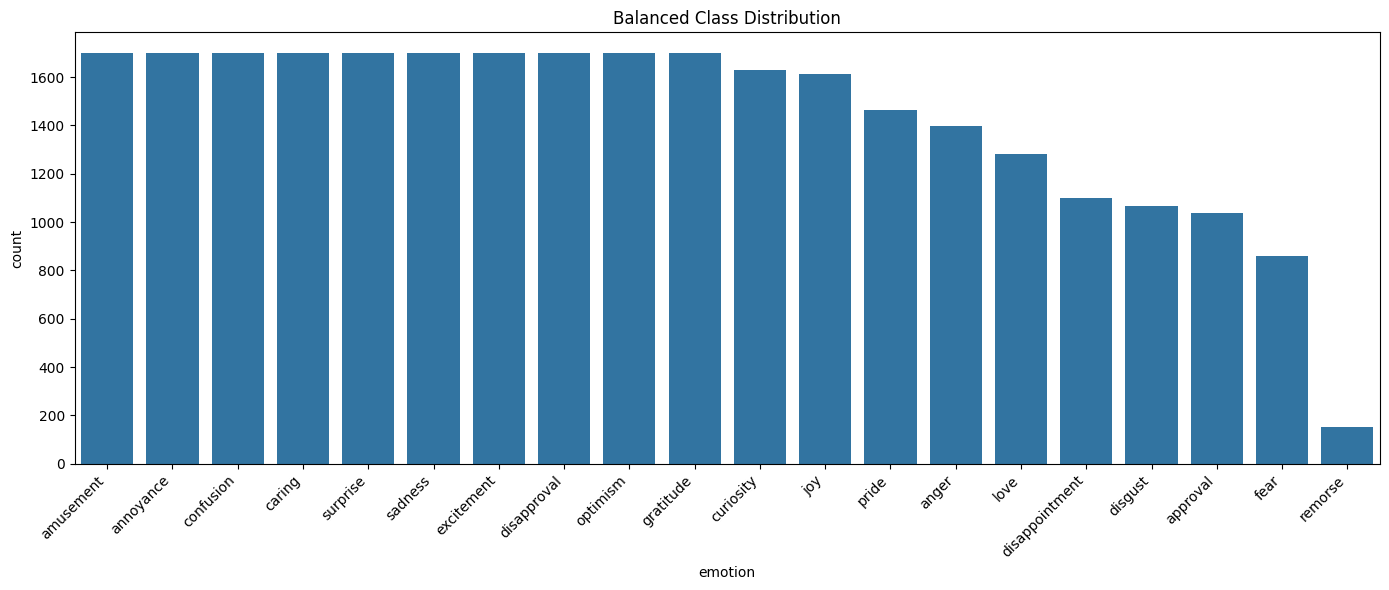


Actual class distribution in balanced dataset:


,emotion,count
0,amusement,1700
2,annoyance,1700
5,confusion,1700
4,caring,1700
19,surprise,1700
18,sadness,1700
10,excitement,1700
8,disapproval,1700
15,optimism,1700
12,gratitude,1700



Comparison between original and balanced dataset:


,emotion,original,balanced,change,percent_change
18,sadness,3750,1700,-2050,-54.7
5,confusion,3561,1700,-1861,-52.3
2,annoyance,3125,1700,-1425,-45.6
4,caring,2392,1700,-692,-28.9
0,amusement,2271,1700,-571,-25.1
10,excitement,2194,1700,-494,-22.5
12,gratitude,2101,1700,-401,-19.1
19,surprise,2100,1700,-400,-19.0
8,disapproval,2034,1700,-334,-16.4
15,optimism,1915,1700,-215,-11.2


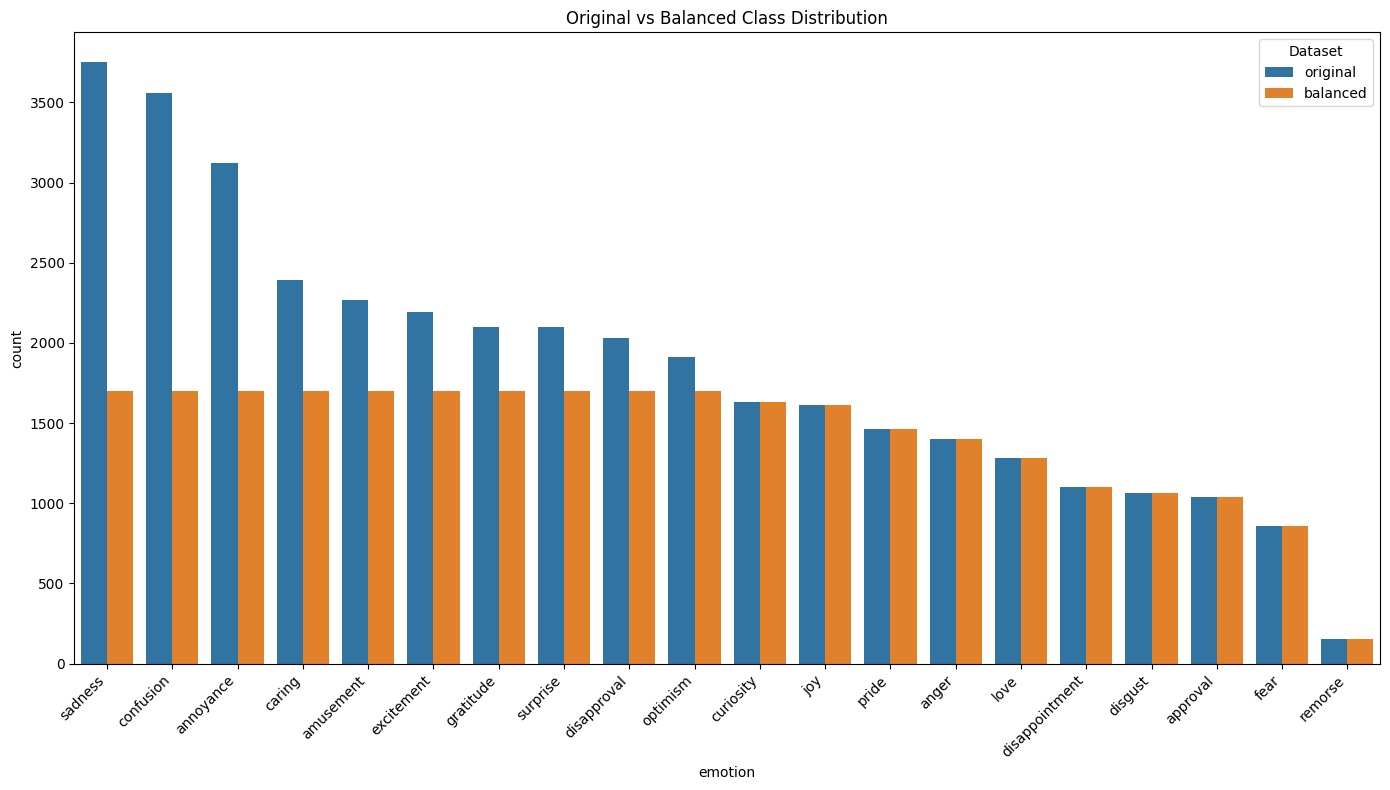


Balanced dataset saved to balance_classes.csv


In [14]:
import pandas as pd
import random
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random seed for reproducibility
random.seed(42)

# Define the emotion columns
EMOTION_COLUMNS = [
    'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust',
    'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride',
    'remorse', 'sadness', 'surprise'
]

# Target number of samples per class
TARGET_SAMPLES = 1700

# Load the dataset
input_path = "emotion_dataset_with_representative.csv"  
print(f"Loading dataset from {input_path}...")
df = pd.read_csv(input_path)
df = df.drop_duplicates(subset=['text'])
print(f"Original dataset shape: {df.shape}")

# Initialize dictionary to store indices for each emotion
emotion_indices = {emotion: [] for emotion in EMOTION_COLUMNS}

# Collect indices for each emotion
print("Collecting samples for each emotion class...")
for idx, row in tqdm(df.iterrows(), total=len(df)):
    for emotion in EMOTION_COLUMNS:
        if row[emotion] == 1:
            emotion_indices[emotion].append(idx)

# Create a dataframe showing class distribution
class_counts_original = {emotion: len(indices) for emotion, indices in emotion_indices.items()}
distribution_df = pd.DataFrame({
    'emotion': list(class_counts_original.keys()),
    'count': list(class_counts_original.values())
}).sort_values('count', ascending=False)

# Display class distribution
print("\nClass distribution in original dataset:")
display(distribution_df)

# Visualize original distribution
plt.figure(figsize=(14, 6))
sns.barplot(x='emotion', y='count', data=distribution_df)
plt.xticks(rotation=45, ha='right')
plt.title('Original Class Distribution')
plt.tight_layout()
plt.show()

# For each emotion, randomly select up to target_samples indices
balanced_indices = set()
balanced_counts = {}

print(f"\nBalancing dataset to have up to {TARGET_SAMPLES} samples per class...")
for emotion in EMOTION_COLUMNS:
    indices = emotion_indices[emotion]
    
    if len(indices) <= TARGET_SAMPLES:
        # If fewer than target_samples, keep all samples
        print(f"{emotion}: Keeping all {len(indices)} samples (fewer than target)")
        balanced_indices.update(indices)
        balanced_counts[emotion] = len(indices)
    else:
        # Randomly select target_samples indices
        selected = random.sample(indices, TARGET_SAMPLES)
        print(f"{emotion}: Selected {len(selected)} samples from {len(indices)}")
        balanced_indices.update(selected)
        balanced_counts[emotion] = TARGET_SAMPLES

# Create balanced DataFrame using the selected indices
balanced_df = df.loc[sorted(list(balanced_indices))]
print(f"\nBalanced dataset shape: {balanced_df.shape}")
# Create dataframe for balanced distribution
balanced_distribution_df = pd.DataFrame({
    'emotion': list(balanced_counts.keys()),
    'count': list(balanced_counts.values())
}).sort_values('count', ascending=False)

# Display balanced distribution
print("\nClass distribution in balanced dataset:")
display(balanced_distribution_df)

# Visualize balanced distribution
plt.figure(figsize=(14, 6))
sns.barplot(x='emotion', y='count', data=balanced_distribution_df)
plt.xticks(rotation=45, ha='right')
plt.title('Balanced Class Distribution')
plt.tight_layout()
plt.show()

# Check actual class distribution in balanced dataset
actual_counts = {emotion: balanced_df[emotion].sum() for emotion in EMOTION_COLUMNS}
actual_distribution_df = pd.DataFrame({
    'emotion': list(actual_counts.keys()),
    'count': list(actual_counts.values())
}).sort_values('count', ascending=False)

print("\nActual class distribution in balanced dataset:")
display(actual_distribution_df)

# Compare original vs balanced
comparison_df = pd.DataFrame({
    'emotion': EMOTION_COLUMNS,
    'original': [class_counts_original[e] for e in EMOTION_COLUMNS],
    'balanced': [actual_counts[e] for e in EMOTION_COLUMNS]
})

# Calculate reduction percentages
comparison_df['change'] = comparison_df['balanced'] - comparison_df['original']
comparison_df['percent_change'] = (comparison_df['change'] / comparison_df['original'] * 100).round(1)
comparison_df = comparison_df.sort_values('original', ascending=False)

print("\nComparison between original and balanced dataset:")
display(comparison_df)

# Visualize comparison
plt.figure(figsize=(14, 8))
comparison_melted = pd.melt(comparison_df, id_vars='emotion', value_vars=['original', 'balanced'],
                           var_name='dataset', value_name='count')
sns.barplot(x='emotion', y='count', hue='dataset', data=comparison_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Original vs Balanced Class Distribution')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Save the balanced dataset
output_path = "balance_classes.csv"  # Change this as needed
balanced_df.to_csv(output_path, index=False)
print(f"\nBalanced dataset saved to {output_path}")

In [15]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm

# Set random seed for reproducibility
random.seed(42)

# Define the emotion columns
EMOTION_COLUMNS = [
    'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust',
    'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride',
    'remorse', 'sadness', 'surprise', 'neutral'
]

# Target number of samples per class
TARGET_SAMPLES = 1700

# Load datasets
primary_path = "balance_classes.csv"  
additional_path = "full_true_synthetic_comments.csv"  #supplementary dataset
output_path = "balance_num_comments.csv"

print(f"Loading primary dataset from {primary_path}...")
primary_df = pd.read_csv(primary_path)

print(f"Loading additional dataset from {additional_path}...")
additional_df = pd.read_csv(additional_path)

# Ensure all columns exist
for emotion in EMOTION_COLUMNS:
    if emotion not in primary_df.columns:
        primary_df[emotion] = 0
    if emotion not in additional_df.columns:
        additional_df[emotion] = 0

# Get counts of each emotion in primary dataset
primary_counts = {emotion: int(primary_df[emotion].sum()) for emotion in EMOTION_COLUMNS}
print("\nCurrent class counts in primary dataset:")
for emotion, count in sorted(primary_counts.items(), key=lambda x: x[1]):
    print(f"{emotion}: {count}")

# Identify which emotions need more samples
emotions_to_augment = []
for emotion in EMOTION_COLUMNS:
    if primary_counts[emotion] < TARGET_SAMPLES:
        emotions_to_augment.append(emotion)
        
print(f"\nFound {len(emotions_to_augment)} emotions with fewer than {TARGET_SAMPLES} samples:")
for emotion in emotions_to_augment:
    print(f"{emotion}: {primary_counts[emotion]} (need {TARGET_SAMPLES - primary_counts[emotion]} more)")

if not emotions_to_augment:
    print("All emotions already have enough samples. No augmentation needed.")
    exit()

# Convert primary dataset to a set of text values for quick duplicate checking
primary_texts = set(primary_df['text'].values)

# Function to find samples in additional dataset for a specific emotion
def find_samples_for_emotion(emotion, needed, existing_texts):
    # Get samples with this emotion
    emotion_samples = additional_df[additional_df[emotion] == 1]
    
    # Filter out duplicates that are already in primary dataset
    new_samples = []
    for idx, row in emotion_samples.iterrows():
        if row['text'] not in existing_texts and len(new_samples) < needed:
            new_samples.append(row)
            existing_texts.add(row['text'])  # Add to set to prevent future duplicates
        
        if len(new_samples) >= needed:
            break
            
    return new_samples, existing_texts

# Augment the dataset for each emotion
print("\nAugmenting dataset...")
augmented_df = primary_df.copy()
total_added = 0

for emotion in emotions_to_augment:
    needed = TARGET_SAMPLES - primary_counts[emotion]
    print(f"Finding samples for {emotion} (need {needed})...")
    
    new_samples, primary_texts = find_samples_for_emotion(emotion, needed, primary_texts)
    
    if new_samples:
        augmented_df = pd.concat([augmented_df, pd.DataFrame(new_samples)], ignore_index=True)
        print(f"  Added {len(new_samples)} samples for {emotion}")
        total_added += len(new_samples)
    else:
        print(f"  No non-duplicate samples available for {emotion}")

# Save the augmented dataset
print(f"\nSaving augmented dataset with {total_added} additional samples...")
augmented_df.to_csv(output_path, index=False)
print(f"Augmented dataset saved to {output_path}")# Check final counts
augmented_counts = {emotion: int(augmented_df[emotion].sum()) for emotion in EMOTION_COLUMNS}
print("\nFinal class counts in augmented dataset:")
for emotion in EMOTION_COLUMNS:
    original = primary_counts[emotion]
    final = augmented_counts[emotion]
    diff = final - original
    print(f"{emotion}: {original} → {final} (+{diff})")

# Save the augmented dataset
print(f"\nSaving augmented dataset with {total_added} additional samples...")
augmented_df.to_csv(output_path, index=False)
print(f"Augmented dataset saved to {output_path}")

Loading primary dataset from balance_classes.csv...
Loading additional dataset from full_true_synthetic_comments.csv...

Current class counts in primary dataset:
neutral: 0
remorse: 151
fear: 860
approval: 1038
disgust: 1067
disappointment: 1100
love: 1280
anger: 1399
pride: 1464
joy: 1611
curiosity: 1631
amusement: 1700
annoyance: 1700
caring: 1700
confusion: 1700
disapproval: 1700
excitement: 1700
gratitude: 1700
optimism: 1700
sadness: 1700
surprise: 1700

Found 11 emotions with fewer than 1700 samples:
anger: 1399 (need 301 more)
approval: 1038 (need 662 more)
curiosity: 1631 (need 69 more)
disappointment: 1100 (need 600 more)
disgust: 1067 (need 633 more)
fear: 860 (need 840 more)
joy: 1611 (need 89 more)
love: 1280 (need 420 more)
pride: 1464 (need 236 more)
remorse: 151 (need 1549 more)
neutral: 0 (need 1700 more)

Augmenting dataset...
Finding samples for anger (need 301)...
  Added 301 samples for anger
Finding samples for approval (need 662)...
  Added 662 samples for approva

In [16]:
# reduced = pd.read_csv("emotion_dataset_20.csv")
# reduced[6:11]

In [17]:
# combined = pd.read_csv("emotion_dataset_with_reduced_emotions.csv")
# combined[6:11]


Class distribution in balanced dataset:


,emotion,count
0,amusement,1700
1,anger,1700
2,annoyance,1700
3,approval,1700
4,caring,1700
5,confusion,1700
7,disappointment,1700
8,disapproval,1700
9,disgust,1700
11,fear,1700


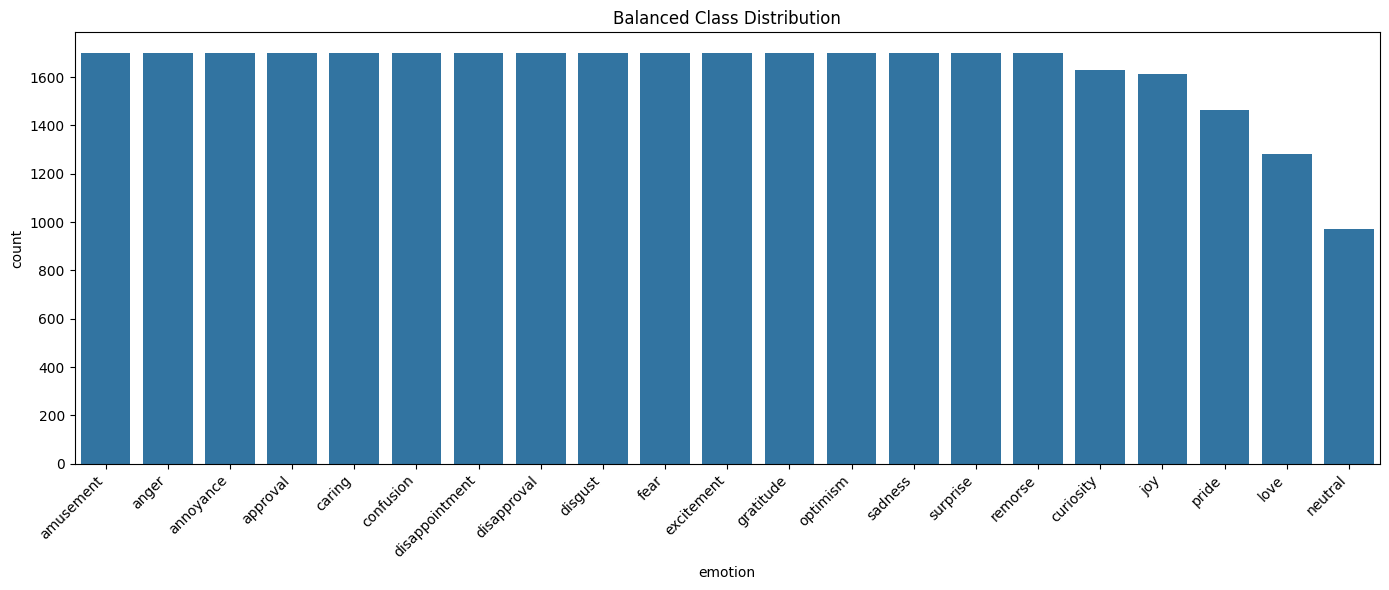

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
AHHHHH = pd.read_csv("balance_num_comments.csv")
no_duplicates = AHHHHH.drop_duplicates(subset=['text'])
# Ensure all columns are numeric
no_duplicates = no_duplicates.apply(pd.to_numeric, errors='coerce')
EMOTION_COLUMNS = [
    'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'disappointment', 'disapproval', 'disgust',
    'excitement', 'fear', 'gratitude', 'joy', 'love', 'optimism', 'pride',
    'remorse', 'sadness', 'surprise', 'neutral'
]
no_duplicates = no_duplicates[EMOTION_COLUMNS]  

# Calculate the count of each emotion
emotion_counts = no_duplicates.sum()

# Create a DataFrame for the balanced distribution
help_df = pd.DataFrame({
    'emotion': emotion_counts.index,
    'count': emotion_counts.values
}).sort_values('count', ascending=False)

# Display balanced distribution
print("\nClass distribution in balanced dataset:")
display(help_df)

# Visualize balanced distribution
plt.figure(figsize=(14, 6))
sns.barplot(x='emotion', y='count', data=help_df)
plt.xticks(rotation=45, ha='right')
plt.title('Balanced Class Distribution')
plt.tight_layout()
plt.show()
